In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def make_image(i,e,matrix, folder = "Animation_"):
    file = folder+matrix+f"/frame_{i}.png"
    A = np.array([[1,e],[e,1]])
    if matrix == "B":
        A = np.array([[1,1],[e*e,1]])
    x = np.arange(-1, 1, 0.1)
    y = np.arange(-1, 1, 0.1)

    X, Y = np.meshgrid(x, y)
    def func(i,j):
        i = i.astype(int)
        j = j.astype(int)
        return A[0,0]*X[i,j]+ A[0,1]*Y[i,j]

    def func1(i,j):
        i = i.astype(int)
        j = j.astype(int)
        return A[1,0]*X[i,j]+ A[1,1]*Y[i,j]
    u = np.fromfunction(func, X.shape, dtype=float)
    v = np.fromfunction(func1, X.shape)

    fig, ax = plt.subplots(figsize =(14, 8))
    ax.quiver(X, Y, u, v)
    ax.set_title(f"transformation by {matrix}| epsilon = {round(e,3)}")
    ax.axis([-1.2, 1.1, -1.2, 1.1])
    ax.set_aspect('equal')
    plt.savefig(file, bbox_inches='tight') 
    plt.close(fig)
    #plt.show()
N=60
for mat in ["A","B"]:
    for i in range(N+1):
        make_image(i,1/N*i,mat, folder = "Animation_")

1


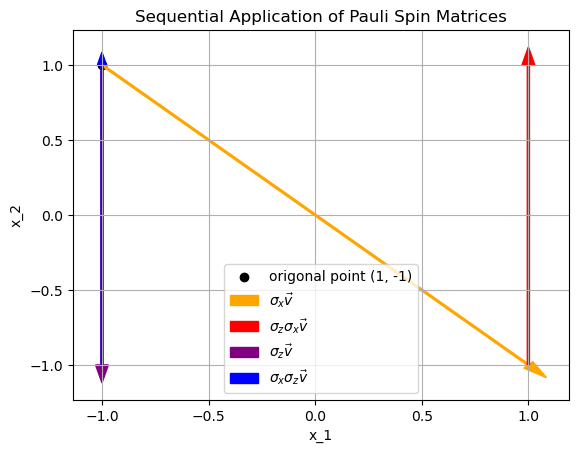

In [54]:
def mag(v):
    return np.sqrt(v[0][0]**2 + v[1][0]**2)

# --- Plotting a single complex number ---
complex_number = 3 + 4j  # Python uses 'j' for the imaginary unit

# Extract the real and imaginary parts
real_part = complex_number.real
imaginary_part = complex_number.imag
sigx = np.array([[0,1],[1,0]])
sigz = np.array([[1,0],[0,-1]])
init = np.array([[-1],[1]])



v_x = np.matmul(sigx,init)
dv_x = v_x - init
dv_xz = np.matmul(sigz,v_x) - v_x
mag_dv_x = mag(dv_x)
mag_dv_xz = mag(dv_xz)

v_z = np.matmul(sigz,init)
dv_z = v_z - init
dv_zx = np.matmul(sigx,v_z)
mag_dv_z = mag(dv_z)
mag_dv_zx = mag(dv_zx)
# Create a scatter plot
width_coeff = 0.005
point_coeff = 0.03
print(init[1][0])
plt.scatter(init[0][0], init[1][0], color='black', marker='o', label=f'origonal point {(init[1][0].item(),init[0][0].item())}')
plt.arrow(init[0][0], init[1][0],dv_x[0][0] ,dv_x[1][0] , color='orange', label='$\sigma_x \\vec{v}$', width=width_coeff*mag_dv_xz, head_width=point_coeff*mag_dv_xz,head_length=2*point_coeff*mag_dv_xz)
plt.arrow(v_x[0][0], v_x[1][0],dv_xz[0][0] ,dv_xz[1][0] , color='red', label='$\sigma_z \sigma_x \\vec{v}$', width=width_coeff*mag_dv_xz, head_width=point_coeff*mag_dv_xz,head_length=2*point_coeff*mag_dv_xz)
plt.arrow(init[0][0], init[1][0],dv_z[0][0] ,dv_z[1][0] , color='purple', label='$\sigma_z \\vec{v}$', width=width_coeff*mag_dv_z, head_width=point_coeff*mag_dv_z,head_length=2*point_coeff*mag_dv_z)
plt.arrow(v_z[0][0], v_z[1][0],dv_xz[0][0] ,dv_xz[1][0] , color='blue', label='$\sigma_x \sigma_z\\vec{v}$', width=width_coeff*mag_dv_zx, head_width=point_coeff*mag_dv_zx,head_length=2*point_coeff*mag_dv_zx)
#plt.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Real axis
#plt.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Imaginary axis
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.title("Sequential Application of Pauli Spin Matrices")
plt.grid(True)
plt.legend()
#plt.gca().set_aspect('equal', adjustable='box') # Ensure equal scaling for axes
plt.show()








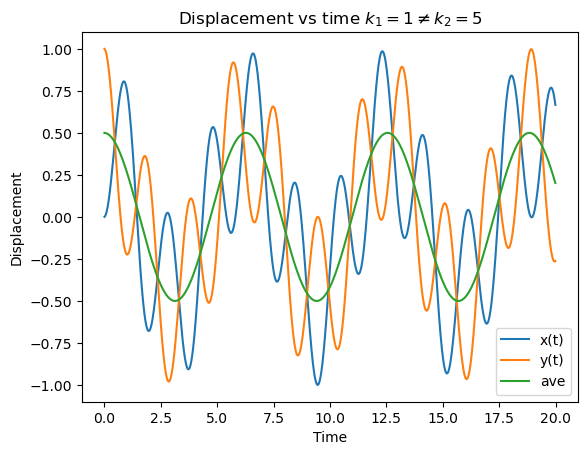

In [145]:
k_1 = 1
k_2 = 5
m = 1
dt = 0.01
tf = 20
x1 = 0
x2 = 1
n = int(tf/dt)
x1s = np.zeros(n)
x2s = np.zeros(n)
ts = np.zeros(n)
x1s[0] =x1
x2s[0] =x2
ts[0] =0
v1 = 0
v2= 0
for i in range(n):
    dv1 = (-(k_1+k_2)*x1 + k_2*x2)*dt
    dv2 = (-(k_1+k_2)*x2 + k_2*x1)*dt
    v1 += dv1
    v2 += dv2
    x1 += v1*dt
    x2 += v2*dt
    x1s[i] =x1
    x2s[i] =x2
    ts[i] = i*dt

plt.plot(ts,x1s, label='x(t)')

plt.plot(ts,x2s, label='y(t)')
plt.plot(ts,(x1s+x2s)/2, label='ave')
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.title(f"Displacement vs time $k_1 = 1 \\neq k_2 = {k_2}$")
plt.legend()
plt.show()

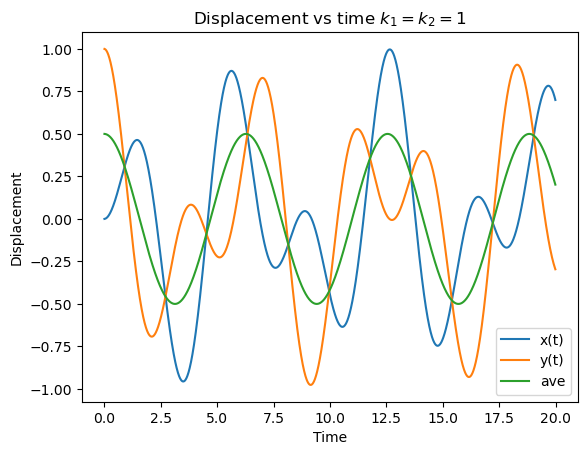

In [141]:
k_1 = 1
k_2 = 1
m = 1
dt = 0.01
tf = 20
x1 = 0
x2 = 1
n = int(tf/dt)
x1s = np.zeros(n)
x2s = np.zeros(n)
ts = np.zeros(n)
x1s[0] =x1
x2s[0] =x2
ts[0] =0
v1 = 0
v2= 0
for i in range(n):
    dv1 = (-(k_1+k_2)*x1 + k_2*x2)*dt
    dv2 = (-(k_1+k_2)*x2 + k_2*x1)*dt
    v1 += dv1
    v2 += dv2
    x1 += v1*dt
    x2 += v2*dt
    x1s[i] =x1
    x2s[i] =x2
    ts[i] = i*dt

plt.plot(ts,x1s, label='x(t)')

plt.plot(ts,x2s, label='y(t)')
plt.plot(ts,(x1s+x2s)/2, label='ave')
plt.xlabel("Time")
plt.ylabel("Displacement")
plt.title("Displacement vs time $k_1 = k_2 = 1$")
plt.legend()
plt.show()

In [ ]:
a = 0.5
b = 1000
c = 0.5

x1m1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
x2m1 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
x1m2 = ((2*c)/(-b+np.sqrt(b**2-4*a*c)))
x2m2 = ((2*c)/(-b-np.sqrt(b**2-4*a*c)))
print(x1m1)
print(x2m1)
print(x1m2)
print(x2m2)

print(100*(x2m2-x1m1)/x2m2)
print(100*(x2m1-x1m2)/x2m1)

-0.0005000001250436981
-1999.9994999998748
-1999.9994998253328
-0.0005000001250000625
-8.727109733295947e-09
8.727104067373784e-09


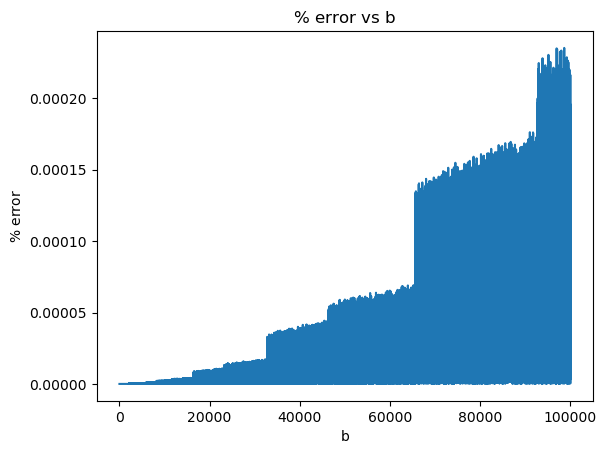

In [153]:
a = 0.5
b = np.linspace(10,100000,100000)
c = 0.5

x1m1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
x2m1 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
x1m2 = ((2*c)/(-b+np.sqrt(b**2-4*a*c)))
x2m2 = ((2*c)/(-b-np.sqrt(b**2-4*a*c)))

plt.plot(b,abs(100*(x2m2-x1m1)/x2m2))
plt.xlabel("b")
plt.ylabel("$\\%$ error")
plt.title("$\\%$ error vs b")
plt.show()

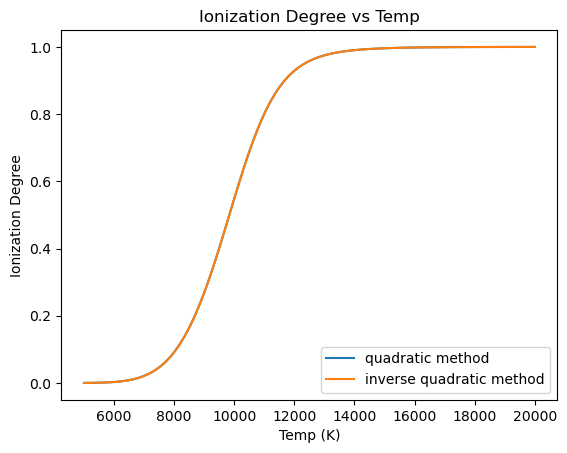

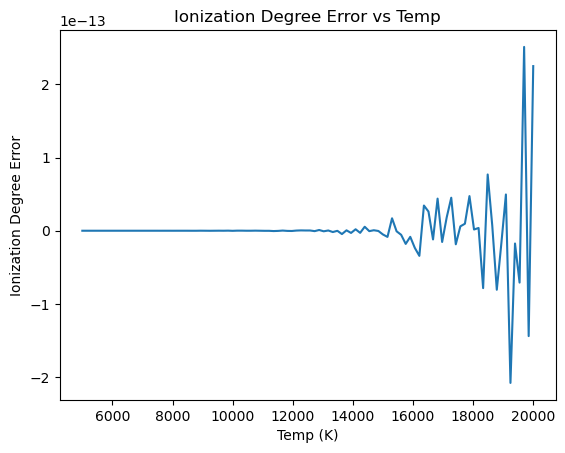

0.9999999999311779 1.0 -6.882205916269868e-11


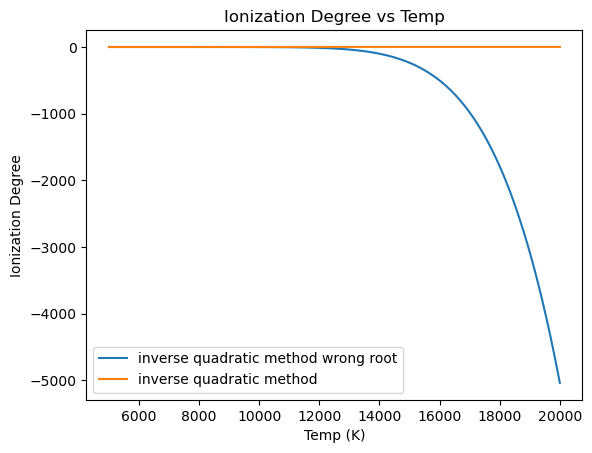

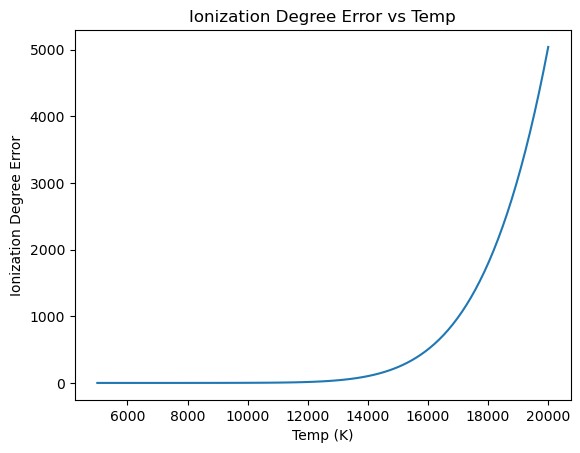

In [157]:
X = 13.6 
k = 8.617 * 10**(-5)
rho = 8.397* 10**(-4)
m_e = 9.1093837 * 10**(-31)
h = 6.62607015 * 10**(-34)
def C(T):
    return (4)*10**(-3) *(T**(3/2)/rho) * np.e**(-X/(k*T))
def Y_quad(T):
    return (-C(T) + np.sqrt(C(T)**2 + 4*C(T)))/2
def Y_new(T):
    return (-2*C(T))/(-C(T) - np.sqrt(C(T)**2 + 4*C(T)))
def Y_bad(T):
    return (-2*C(T))/(-C(T) + np.sqrt(C(T)**2 + 4*C(T)))
x = np.linspace(5000,20000,100)


y = Y_quad(x)
plt.plot(x,y, label='quadratic method')

y = Y_new(x)
plt.plot(x,y, label='inverse quadratic method')

plt.xlabel("Temp (K)")
plt.ylabel("Ionization Degree")
plt.title("Ionization Degree vs Temp")
plt.legend()
plt.show()


y = Y_new(x) -Y_quad(x)
plt.plot(x,y)

plt.xlabel("Temp (K)")
plt.ylabel("Ionization Degree Error")
plt.title("Ionization Degree Error vs Temp")
plt.show()

print(Y_new(2206000), Y_quad(2206000), Y_new(2206000) -Y_quad(2206000))

y = Y_bad(x)
plt.plot(x,y, label='inverse quadratic method wrong root')

y = Y_new(x)
plt.plot(x,y, label='inverse quadratic method')

plt.xlabel("Temp (K)")
plt.ylabel("Ionization Degree")
plt.title("Ionization Degree vs Temp")
plt.legend()
plt.show()


y = Y_new(x) -Y_bad(x)
plt.plot(x,y)

plt.xlabel("Temp (K)")
plt.ylabel("Ionization Degree Error")
plt.title("Ionization Degree Error vs Temp")
plt.show()

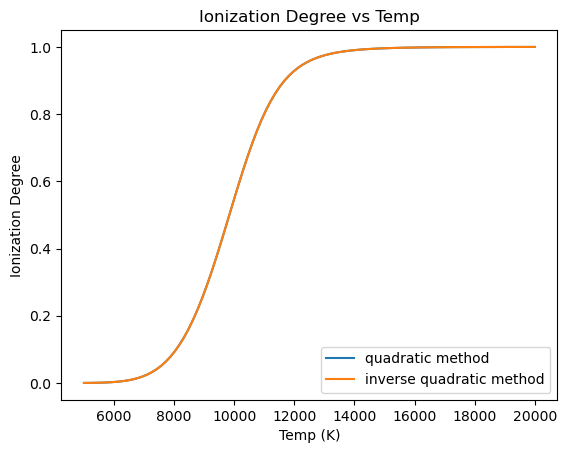

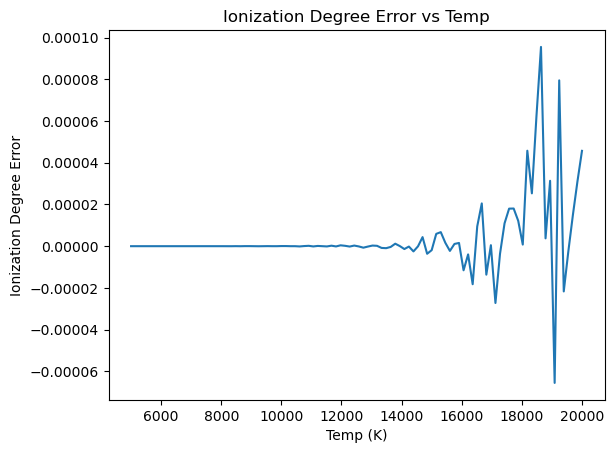

In [158]:
X = np.float32(13.6 )
k = np.float32(8.617 * 10**(-5))
rho = np.float32(8.397* 10**(-4))
m_e = np.float32(9.1093837 * 10**(-31))
h = np.float32(6.62607015 * 10**(-34))
def C(T):
    return np.float32((4)*10**(-3)) *(T**(3/2)/rho) * np.e**(-X/(k*T))
def Y_quad(T):
    return (-C(T) + np.sqrt(C(T)**2 + 4*C(T)))/2
def Y_new(T):
    return (-2*C(T))/(-C(T) - np.sqrt(C(T)**2 + 4*C(T)))
def Y_bad(T):
    return (-2*C(T))/(-C(T) + np.sqrt(C(T)**2 + 4*C(T)))
x = np.linspace(5000,20000,100, dtype=np.float32)


y = Y_quad(x)
plt.plot(x,y, label='quadratic method')

y = Y_new(x)
plt.plot(x,y, label='inverse quadratic method')

plt.xlabel("Temp (K)")
plt.ylabel("Ionization Degree")
plt.title("Ionization Degree vs Temp")
plt.legend()
plt.show()


y = Y_new(x) -Y_quad(x)
plt.plot(x,y)

plt.xlabel("Temp (K)")
plt.ylabel("Ionization Degree Error")
plt.title("Ionization Degree Error vs Temp")
plt.show()

In [160]:
a = np.float32(0.5)
b = np.float32(1000)
c = np.float32(0.5)

x1m1 = (-b+np.sqrt(b**2-4*a*c))/(2*a)
x2m1 = (-b-np.sqrt(b**2-4*a*c))/(2*a)
x1m2 = ((2*c)/(-b+np.sqrt(b**2-4*a*c)))
x2m2 = ((2*c)/(-b-np.sqrt(b**2-4*a*c)))
print(x1m1)
print(x2m1)
print(x1m2)
print(x2m2)

print(100*(x2m2-x1m1)/x2m2)
print(100*(x2m1-x1m2)/x2m1)

-0.00048828125
-1999.9995
-2048.0
-0.00050000014
2.3437774
-2.400025
